In [112]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import hvplot.pandas

In [113]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [114]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [115]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df.select_dtypes(include=['float64', 'int64']))


In [116]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=market_data_df.select_dtypes(include=['float64', 'int64']).columns)

# Print the columns of the original DataFrame
print(market_data_df.columns)


Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


In [117]:
# Copy the crypto names from the original data
scaled_df['coin_id'] = market_data_df.index

# Set the coinid column as index
scaled_df.set_index('coin_id', inplace=True)

# Display sample data
display(scaled_df.head())

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [118]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    # Create a KMeans model
    kmeans = KMeans(n_clusters=k)
    
    # Fit the model to the data using the scaled DataFrame
    kmeans.fit(scaled_df)
    
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve

elbow_data = {'k': k_values, 'inertia': inertia_values}



# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
display(df_elbow)

c:\Users\bradl\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bradl\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\bradl\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bradl\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bradl\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bradl\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,64.127997
5,6,52.101806
6,7,45.939185
7,8,36.782663
8,9,32.889277
9,10,28.576577


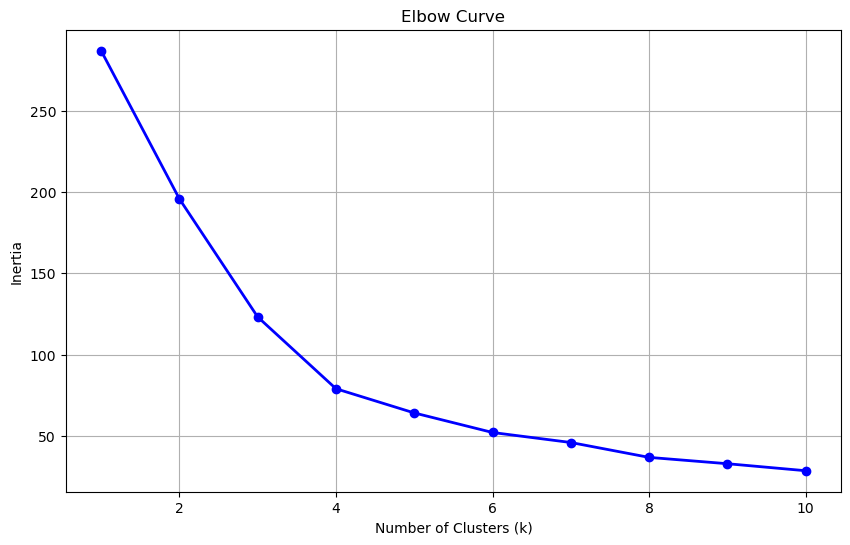

In [119]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', color='b', linestyle='-', linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 3

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [120]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans_model = KMeans(n_clusters=best_k, random_state=0)

In [121]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(scaled_df)

c:\Users\bradl\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bradl\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [122]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_model.predict(scaled_df)

# View the resulting array of cluster values.
display(cluster_labels)

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [123]:
# Create a copy of the DataFrame
df_copy = scaled_df.copy()

In [124]:
# Add a new column to the DataFrame with the predicted clusters
scaled_df['Cluster'] = cluster_labels

# Display sample data
display(scaled_df.head())

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


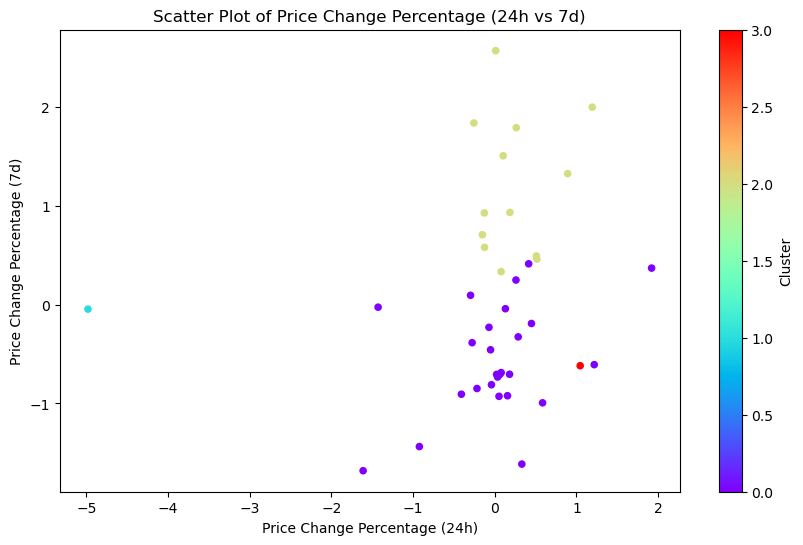

In [125]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

scaled_df.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c='Cluster', colormap='rainbow', figsize=(10, 6))
plt.title("Scatter Plot of Price Change Percentage (24h vs 7d)")
plt.xlabel("Price Change Percentage (24h)")
plt.ylabel("Price Change Percentage (7d)")
plt.show()


### Optimize Clusters with Principal Component Analysis.

In [126]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [127]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_result = pca.fit_transform(scaled_df)
df_pca = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2', 'PCA3'])

# View the first five rows of the DataFrame. 
display(df_pca.head())

,PCA1,PCA2,PCA3
0,1.194082,-0.902074,-0.585338
1,1.009706,-0.663584,-1.136950
2,-0.722536,-0.307632,0.721813
3,-0.748266,-0.332379,0.558479
4,2.258539,-1.826966,-1.378166


In [128]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
print(sum(explained_variance))

[0.37269822 0.32489961 0.18917649]
0.8867743104975921


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8867743104975921

In [129]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data


# Copy the crypto names from the original data

df_pca['coin_id'] = market_data_df.index

# Set the coinid column as index
df_pca.set_index('coin_id', inplace=True)

# Display sample data
display(df_pca.head(10))

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,1.194082,-0.902074,-0.585338
ethereum,1.009706,-0.663584,-1.136950
tether,-0.722536,-0.307632,0.721813
ripple,-0.748266,-0.332379,0.558479
bitcoin-cash,2.258539,-1.826966,-1.378166
binancecoin,1.719188,-0.993613,-0.663561
chainlink,1.396401,-0.721542,-2.731341
cardano,1.359187,-0.651114,-1.482162
litecoin,0.869062,-0.828724,-0.856779


### Find the Best Value for k Using the PCA Data

In [130]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k)
    # 2. Fit the model to the data using PCA DataFrame.
    kmeans.fit(df_pca)
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
display(df_elbow)

c:\Users\bradl\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bradl\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bradl\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bradl\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

,k,inertia
0,1,290.018457
1,2,199.108053
2,3,112.401201
3,4,43.586433
4,5,32.594964
5,6,23.915931
6,7,18.525171
7,8,14.796250
8,9,12.503838
9,10,9.359173


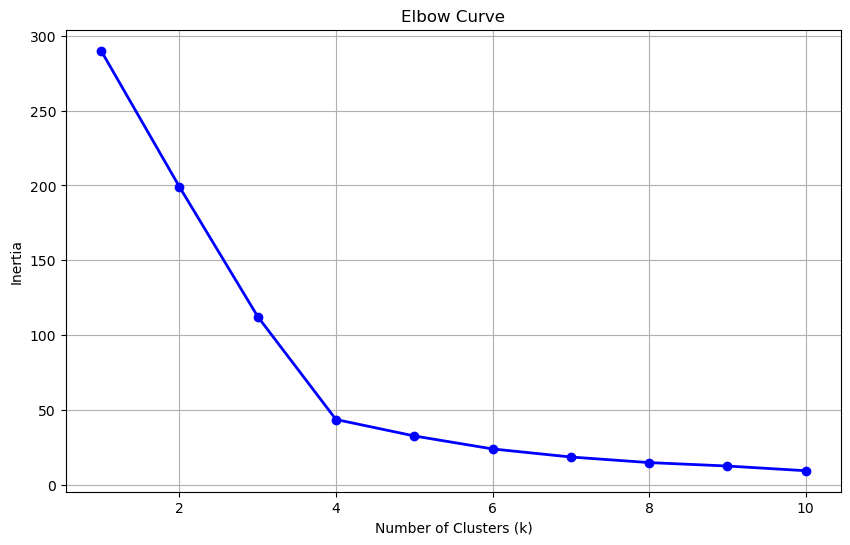

In [131]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', color='b', linestyle='-', linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [132]:
# Initialize the K-Means model using the best value for k
best_k = 4
best_kmeans_model = KMeans(n_clusters=best_k)
  

In [133]:
# Fit the K-Means model using the PCA data
best_kmeans_model.fit(df_pca)

c:\Users\bradl\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bradl\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [134]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_values = best_kmeans_model.predict(df_pca)

# Print the resulting array of cluster values.
print(cluster_values)

[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 3 0 1 1 2
 1 1 1 1]


In [135]:
# Create a copy of the DataFrame with the PCA data
df_pca_clusters = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_clusters['Cluster'] = cluster_values

# Display sample data
display(df_pca_clusters.head())

,PCA1,PCA2,PCA3,Cluster
coin_id,,,,
bitcoin,1.194082,-0.902074,-0.585338,0
ethereum,1.009706,-0.663584,-1.136950,0
tether,-0.722536,-0.307632,0.721813,1
ripple,-0.748266,-0.332379,0.558479,1
bitcoin-cash,2.258539,-1.826966,-1.378166,0


In [136]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 


scatter_plot = df_pca_clusters.hvplot.scatter(x="PCA1", y="PCA2", c="Cluster", cmap='viridis')
scatter_plot

:Scatter   [PCA1]   (PCA2,Cluster)

### Determine the Weights of Each Feature on each Principal Component

In [137]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.DataFrame(pca.components_.T[:, :2], columns=['PCA1', 'PCA2'], index=scaled_df.columns)
pca_component_weights

,PCA1,PCA2
price_change_percentage_24h,0.134559,-0.498919
price_change_percentage_7d,0.296044,-0.185493
price_change_percentage_14d,0.495856,-0.179055
price_change_percentage_30d,0.485907,0.017649
price_change_percentage_60d,0.376799,0.184509
price_change_percentage_200d,0.203103,0.556389
price_change_percentage_1y,0.076212,0.581362
Cluster,0.472479,-0.052015


In [138]:
# Get the shape of pca_comonent_weights
print(pca_component_weights.shape)


(8, 2)


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** "price_change_percentage_14d" and "price_change_percentage_30d" have the strongest positive influence on PCA1.
              "price_change_percentage_1y" and "price_change_percentage_200d" have the strongest positive influence on PCA2.
              There is no negative influence on PCA1. price_change_percentage_1y" has the weakest positive influence on PCA1. 
              "price_change_percentage_24h" has the strongest negative influence on PCA2.
    